<h1><b>Prediction using Supervised Machine Learning</b></h1>



In [9]:
#importing all the necessary libraries    
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [70]:
#importing the data set
df=pd.read_csv("/content/task1.txt")
copy_df=df

print("Five rows printing done")
copy_df.head()

Five rows printing done


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
#checking the information about the data
copy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
copy_df.count()

Hours     25
Scores    25
dtype: int64

In [7]:
#here we use describe() method so that we can able to see percentiles,mean,std,max,count of the given dataset.
copy_df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


<h2><b>Data Visualisation</b></h2>

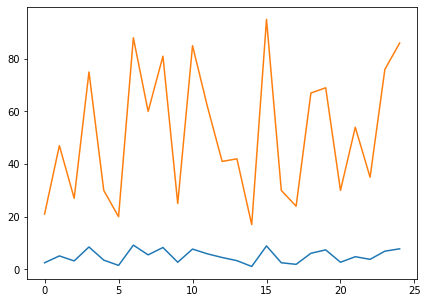

In [14]:
plt.figure(figsize=(7,5))
plt.plot(copy_df)
plt.show()

<h2><b>Scatter Plot is showing the all the data points are linearly related to each other.Hence, the pridiction accuracy will be more</b></h2>

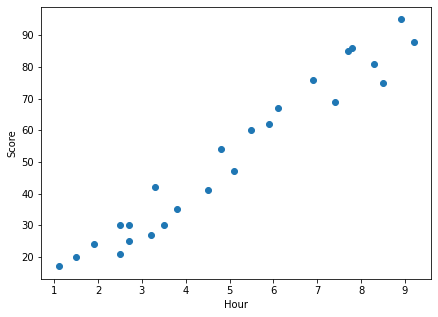

In [17]:
plt.figure(figsize=(7,5))
x=copy_df['Hours']
y=copy_df['Scores']
plt.xlabel("Hour",fontsize=10)
plt.ylabel("Score",fontsize=10)
plt.scatter(x,y)
plt.show()

In [35]:
X = copy_df.iloc[:,:-1].values
Y = copy_df.iloc[:,1].values
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [36]:
Y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

<h2><b>Preparing the data and splitting the data into test and train set</b></h2>

In [48]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state = 0,test_size=0.33)

In [49]:
print("X train.shape =", X_train.shape)
print("Y train.shape =", Y_train.shape)
print("X test.shape  =", X_test.shape)
print("Y test.shape  =", Y_test.shape)

X train.shape = (16, 1)
Y train.shape = (16,)
X test.shape  = (9, 1)
Y test.shape  = (9,)


<h2><b>Importing the Linear Regression Model</b></h2>

In [39]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()

**Training the model**

In [50]:
linreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
print("B0 =",linreg.intercept_,"\nB1 =",linreg.coef_)

B0 = 2.5069547569547197 
B1 = [9.69062469]


In [52]:
Y0 = linreg.intercept_ + linreg.coef_*X_train #equation of the line y=mx+c

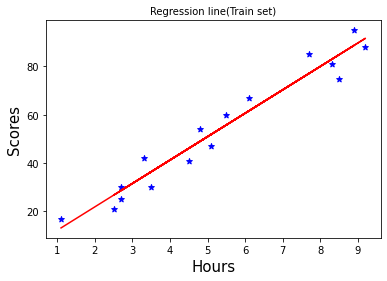

In [53]:
plt.scatter(X_train,Y_train,color='blue',marker='*')
plt.plot(X_train,Y0,color='red')
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.title("Regression line(Train set)",fontsize=10)
plt.show()

**Prediction with Test Data**

In [55]:
Y_predict=linreg.predict(X_test)
print(Y_predict)

[17.04289179 33.51695377 74.21757747 26.73351648 59.68164043 39.33132858
 20.91914167 78.09382734 69.37226512]


Text(0.5, 1.0, 'Regression line(Test set)')

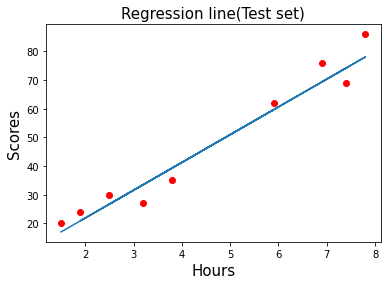

In [60]:
plt.plot(X_test,Y_predict)
plt.scatter(X_test,Y_test,color='red')
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.title("Regression line(Test set)",fontsize=15)

**Comparing the Result with the actual value**

In [62]:
Y_test1 = list(Y_test)
prediction=list(Y_predict)
df_compare = pd.DataFrame({ 'Actual':Y_test1,'Result':prediction})
df_compare

,Actual,Result
0,20,17.042892
1,27,33.516954
2,69,74.217577
3,30,26.733516
4,62,59.681640
5,35,39.331329
6,24,20.919142
7,86,78.093827
8,76,69.372265


**Checking the accuracy of the model**

In [64]:
from sklearn import metrics
metrics.r2_score(Y_test,Y_predict)

0.9555700801388128

**Checking the Errors**

In [68]:
MSE = metrics.mean_squared_error(Y_test,Y_predict)
root_E = np.sqrt(metrics.mean_squared_error(Y_test,Y_predict))
Abs_E = np.sqrt(metrics.mean_squared_error(Y_test,Y_predict))
print("Mean Squared Error      = ",MSE)
print("Root Mean Squared Error = ",root_E)
print("Mean Absolute Error     = ",Abs_E)

Mean Squared Error      =  25.463280738222593
Root Mean Squared Error =  5.046115410711748
Mean Absolute Error     =  5.046115410711748


**Conclusion**

In [66]:
Prediction_score = linreg.predict([[9.25]])
print("Predicted score for a student studying 9.25 hours :",Prediction_score)

Predicted score for a student studying 9.25 hours : [92.14523315]
